In [1]:
import torch
from torch import nn
from loguru import logger

In [2]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.x = nn.Parameter(torch.tensor(1.0))

    def forward(self):
        return (self.x + 1) ** 2

In [3]:
def training_loop(model: nn.Module, optimizer, num_iters: int):

    losses = []

    for i in range(num_iters):
        loss = model()
        loss.backward()
        logger.info(f"Gradient: {model.x.grad}")
        optimizer.step()
        optimizer.zero_grad()

        # Take projection
        logger.info(f"type(model.x.data) = {model.x.data}")
        logger.info(f"(Before projection) model.x.data = {model.x.data}")
        lim = float(0.5)
        logger.info(f"type(lim): {type(lim)}")
        if model.x.data < lim:
            model.x.data = torch.tensor(0.5)
        logger.info(f"(After projection) model.x.data = {model.x.data}")

        losses.append(loss)

        if i % 10 == 0:
            logger.info(f"Iteration: {i}/{num_iters}")

    return losses
    

In [4]:
m = Model()
opt = torch.optim.SGD(m.parameters(), lr=0.1)
losses = training_loop(model=m, optimizer=opt, num_iters=40)

2023-04-11 12:27:11.663 | INFO     | __main__:training_loop:8 - Gradient: 4.0
2023-04-11 12:27:11.665 | INFO     | __main__:training_loop:13 - type(model.x.data) = 0.6000000238418579
2023-04-11 12:27:11.665 | INFO     | __main__:training_loop:14 - (Before projection) model.x.data = 0.6000000238418579
2023-04-11 12:27:11.666 | INFO     | __main__:training_loop:16 - type(lim): <class 'float'>
2023-04-11 12:27:11.667 | INFO     | __main__:training_loop:19 - (After projection) model.x.data = 0.6000000238418579
2023-04-11 12:27:11.668 | INFO     | __main__:training_loop:24 - Iteration: 0/40
2023-04-11 12:27:11.670 | INFO     | __main__:training_loop:8 - Gradient: 3.200000047683716
2023-04-11 12:27:11.671 | INFO     | __main__:training_loop:13 - type(model.x.data) = 0.2800000011920929
2023-04-11 12:27:11.672 | INFO     | __main__:training_loop:14 - (Before projection) model.x.data = 0.2800000011920929
2023-04-11 12:27:11.672 | INFO     | __main__:training_loop:16 - type(lim): <class 'float'>

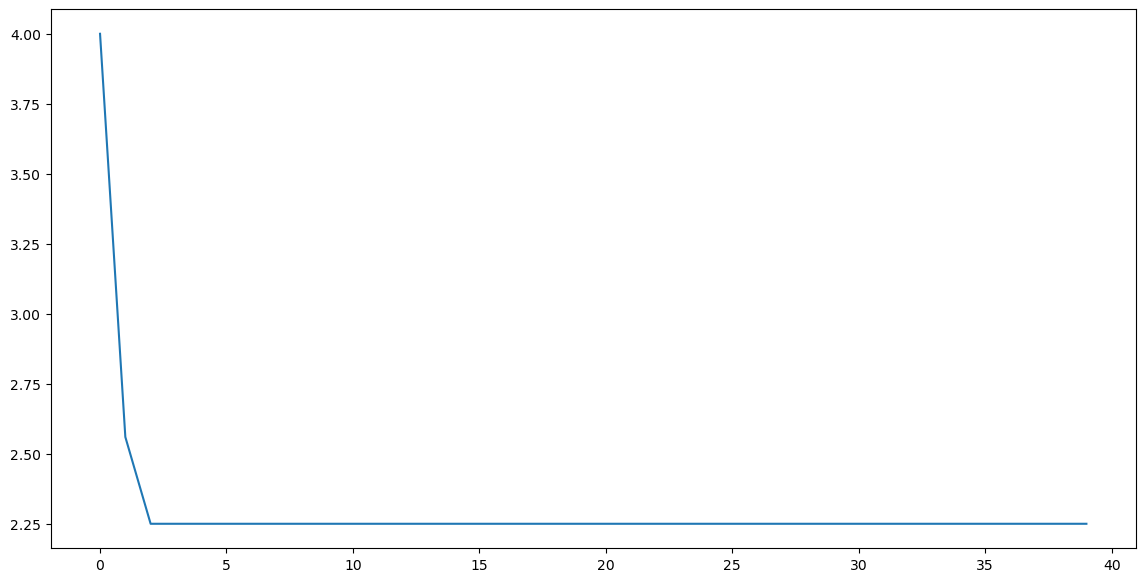

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
with torch.no_grad():
    plt.plot(losses)